# Practicing Deep Learning for Audio

Using Towards Data Science article:
### Audio Deep Learning Made Simple By Ketan Doshi
https://towardsdatascience.com/audio-deep-learning-made-simple-part-1-state-of-the-art-techniques-da1d3dff2504


In [70]:
import librosa
import scipy
import numpy as np
import matplotlib.pyplot as plt
import librosa.display

In [71]:
# Load the audio file
AUDIO_FILE = './AudioFile.wav'
samples, sample_rate = librosa.load(AUDIO_FILE, sr=None)

In [72]:
samples

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [73]:
sample_rate

48000

## Visualize the sound wave

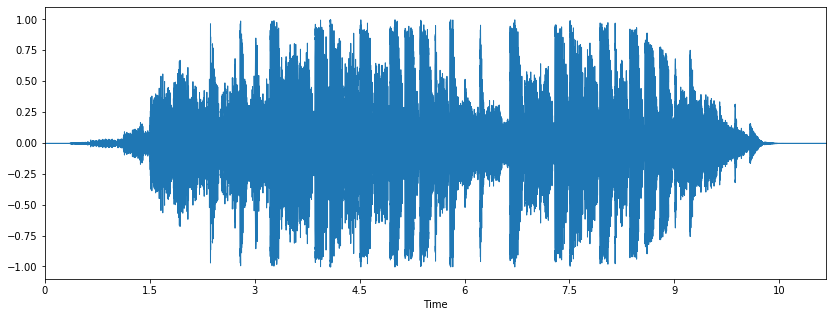

In [74]:
# x-axis has been converted to time using our sample rate. 
# matplotlib plt.plot(y), would output the same figure, but with sample 
# number on the x-axis instead of seconds
plt.figure(figsize=(14, 5))
librosa.display.waveplot(samples, sr=sample_rate)

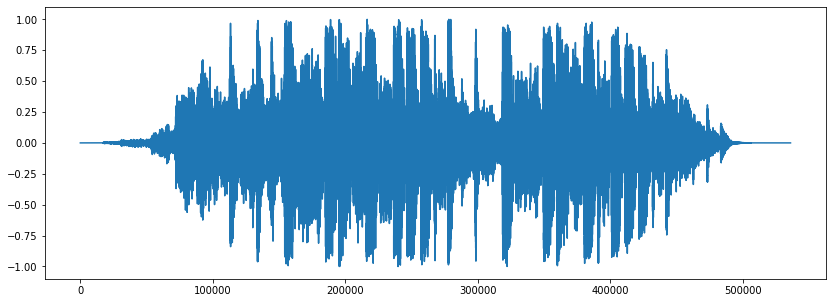

In [75]:
plt.figure(figsize=(14, 5))
plt.plot(samples)

In [76]:
from IPython.display import Audio
Audio(AUDIO_FILE)

In [77]:
samples[100000:100040]

array([ 0.0663147 ,  0.06486511,  0.0664978 ,  0.06692505,  0.05683899,
        0.03762817,  0.02259827,  0.01528931,  0.00669861, -0.00430298,
       -0.00947571, -0.00682068, -0.00030518,  0.00820923,  0.01725769,
        0.02526855,  0.03117371,  0.03103638,  0.02314758,  0.01583862,
        0.01702881,  0.02178955,  0.02249146,  0.02107239,  0.0213623 ,
        0.02033997,  0.0138092 ,  0.00416565, -0.00109863,  0.00050354,
        0.0007782 , -0.00791931, -0.01945496, -0.02220154, -0.01441956,
       -0.00123596,  0.01325989,  0.0242157 ,  0.02764893,  0.02455139],
      dtype=float32)

## Simple Spectrogram
plots Frequency vs Time

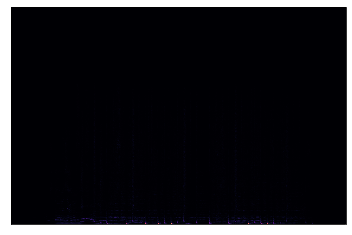

In [78]:
#equivalent to:
#sgram = scipy.signal.stft(samples, fs=sample_rate/60 )[2]
sgram = librosa.stft(samples)
librosa.display.specshow(sgram)

## Mel Spectrograms
A Mel Spectrogram makes two important changes relative to a regular Spectrogram that plots Frequency vs Time.

It uses the Mel Scale instead of Frequency on the y-axis.

It uses the Decibel Scale instead of Amplitude to indicate colors.

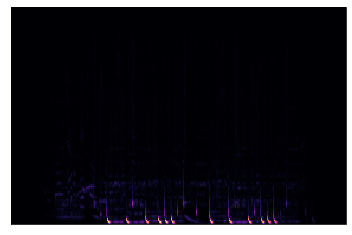

In [79]:
# use the mel-scale instead of raw frequency
sgram_mag, _ = librosa.magphase(sgram)
mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=sample_rate)
librosa.display.specshow(mel_scale_sgram)

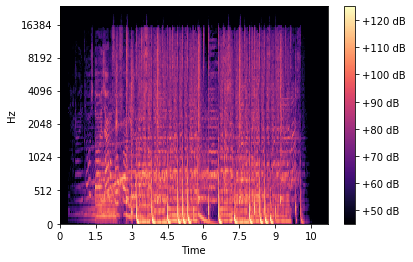

In [80]:
# use the decibel scale to get the final Mel Spectrogram
mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
librosa.display.specshow(mel_sgram, sr=sample_rate, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')

## Data Preparation and Augmentation